# Outlier Detection of 4 Digit MWC 4 Players using Tournament Scores

In [1]:
import os

os.chdir("..")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from utils.lof import LOF
from utils.metrics import nan_euclidean, elastic_nan_euclidean
from utils import get_table_players

In [4]:
from utils import Dataset

In [5]:
euclidean_regularized = elastic_nan_euclidean(1, 0.5, 0.5)
euclidean_ridge = elastic_nan_euclidean(1, 0.5, 0)
euclidean_lasso = elastic_nan_euclidean(1, 0, 0.5)

In [6]:
_4dm4_impute = Dataset('datasets/4dm3.db')

In [7]:
_4dm4_data = _4dm4_impute.select('scores', columns=['player_name', 'round', 'beatmap_type', 'beatmap_tag', 'score_logit'], where={
    'beatmap_type': ['LN', 'RC', 'HB'],
})

In [8]:
_4dm4_table = get_table_players(_4dm4_data)

In [9]:
standardized_4dm = pd.DataFrame(index=_4dm4_table.index)

In [10]:
for col in _4dm4_table.columns:
    mu = np.nanmean(_4dm4_table[col]); sigma = np.nanstd(_4dm4_table[col], ddof=1)
    standardized_4dm[col] = _4dm4_table[col].apply(lambda x: (x - mu) / sigma)

In [11]:
standardized_4dm.head()

,Q_RC_1,Q_LN_1,Q_HB_1,GS_RC_1,GS_RC_2,GS_RC_4,GS_LN_1,GS_LN_2,GS_HB_1,RO16_RC_4,...,GF_RC_6,GF_RC_7,GF_LN_1,GF_LN_2,GF_LN_3,GF_HB_2,QF_LN_1,SF_HB_1,GF_HB_3,RO16_HB_2
Scep,2.017505,0.218490,0.713758,2.240486,-1.315069,2.130158,0.531339,0.605757,2.026246,2.219624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chiara,1.127118,0.243935,1.123565,0.612993,2.363380,1.193031,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paturages,2.371593,NaN,NaN,1.017415,1.030878,1.458316,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2zi,2.227634,NaN,NaN,1.688407,0.869808,0.464348,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZayyKen,1.163159,0.790546,1.877259,2.346803,2.435073,1.507435,1.482213,NaN,2.449809,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Implementing the Local Outlier Factor Model

We then declare the model with n_neighbors (k) = 5 and use our defined Elastic Euclidean Distance as a Metric

In [12]:
lof_elastic = LOF(5, euclidean_regularized)
lof_ridge = LOF(5, euclidean_ridge)
lof_lasso = LOF(5, euclidean_lasso)
lof_euclidean = LOF(5, nan_euclidean)

We then train and predict the Local Outlier Factor of each player, stored in `lof_values`

In [13]:
lof_euclid_values = lof_euclidean.fit_predict(standardized_4dm.values)
lof_ridge_values = lof_ridge.fit_predict(standardized_4dm.values)
lof_lasso_values = lof_lasso.fit_predict(standardized_4dm.values)
lof_elastic_values = lof_elastic.fit_predict(standardized_4dm.values)

Then we map those in a `DataFrame` in order to assign players their Local Outlier Factors

In [14]:
lof_4dm = pd.DataFrame(index=standardized_4dm.index)

lof_4dm['lof_euclid'] = lof_euclid_values
lof_4dm['lof_ridge'] = lof_ridge_values
lof_4dm['lof_lasso'] = lof_lasso_values
lof_4dm['lof_elastic'] = lof_elastic_values

In [15]:
lof_4dm.sort_values(by='lof_ridge', ascending=False).head(16)['lof_ridge']

Yuragi            32.442137
ZayyKen           14.007038
Scep              12.644152
2fast4you98       12.474349
[-Leon-]          11.538132
diamondBIaze      10.268556
-Deepdive-         7.944686
Lenn               6.089169
shokoha            6.056319
palmEuEi           5.774850
s_kolorowa         3.928856
FastTapper         3.730110
KamaTheCrimson     3.611701
Zycrxd             3.489846
Silicosis          3.459075
Chiara             3.264232
Name: lof_ridge, dtype: float64

In [16]:
lof_4dm.sort_values(by='lof_lasso', ascending=False).head(16)['lof_lasso']

Yuragi            11.540383
ZayyKen            9.078184
[-Leon-]           8.825753
2fast4you98        8.110189
Scep               6.982859
diamondBIaze       6.055501
shokoha            5.752285
palmEuEi           5.459367
Lenn               4.718796
-Deepdive-         4.076386
Expired112         3.834805
s_kolorowa         3.815867
Zycrxd             3.790274
Silicosis          3.493307
Ju1nY11            3.465471
KamaTheCrimson     3.144138
Name: lof_lasso, dtype: float64

In [17]:
lof_4dm.sort_values(by='lof_elastic', ascending=False).head(16)['lof_elastic']

Yuragi            21.912948
ZayyKen           11.265944
2fast4you98       10.105948
[-Leon-]           9.980812
Scep               9.750474
diamondBIaze       8.100320
-Deepdive-         5.956632
shokoha            5.727935
palmEuEi           5.527980
Lenn               5.353600
s_kolorowa         3.647358
Silicosis          3.494408
Zycrxd             3.461927
KamaTheCrimson     3.303357
FastTapper         3.176809
Chiara             3.163687
Name: lof_elastic, dtype: float64

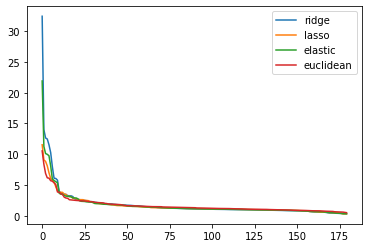

In [18]:
l_ridge = lof_4dm.sort_values(by='lof_ridge', ascending=False)['lof_ridge'].values
l_lasso = lof_4dm.sort_values(by='lof_lasso', ascending=False)['lof_lasso'].values
l_elastic = lof_4dm.sort_values(by='lof_elastic', ascending=False)['lof_elastic'].values
l_euclid = lof_4dm.sort_values(by='lof_euclid', ascending=False)['lof_euclid'].values
plt.plot(l_ridge, label="ridge")
plt.plot(l_lasso, label="lasso")
plt.plot(l_elastic, label="elastic")
plt.plot(l_euclid, label="euclidean")
plt.legend()
plt.show()

<AxesSubplot:>

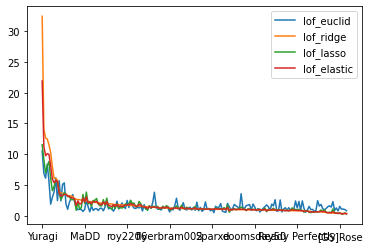

In [19]:
lof_4dm.sort_values(by='lof_ridge', ascending=False).plot()

<AxesSubplot:>

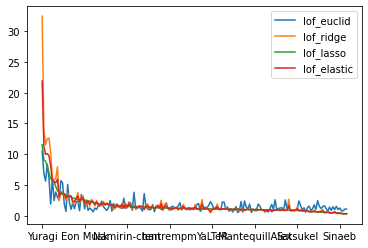

In [20]:
lof_4dm.sort_values(by='lof_lasso', ascending=False).plot()

<AxesSubplot:>

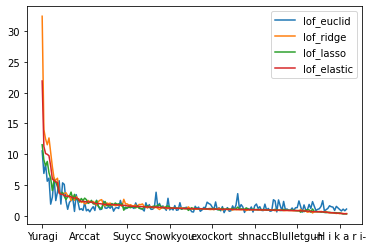

In [21]:
lof_4dm.sort_values(by='lof_elastic', ascending=False).plot()

<AxesSubplot:>

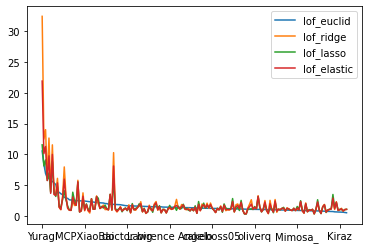

In [22]:
lof_4dm.sort_values(by='lof_euclid', ascending=False).plot()

In [23]:
log_euclid = np.log(lof_4dm['lof_euclid'])
log_ridge = np.log(lof_4dm['lof_ridge'])
log_lasso = np.log(lof_4dm['lof_lasso'])
log_elastic = np.log(lof_4dm['lof_elastic'])

(array([ 8., 26., 50., 47., 19., 17.,  4.,  4.,  3.,  2.]),
 array([-0.70678301, -0.40060066, -0.09441831,  0.21176404,  0.51794639,
         0.82412874,  1.13031109,  1.43649345,  1.7426758 ,  2.04885815,
         2.3550405 ]),
 <BarContainer object of 10 artists>)

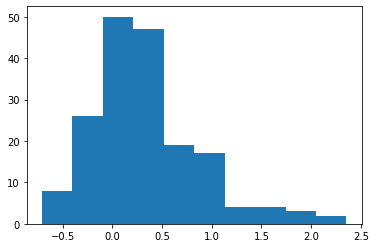

In [24]:
plt.hist(log_euclid)

(array([13., 18., 80., 34., 19.,  6.,  4.,  4.,  1.,  1.]),
 array([-1.11601513, -0.65646781, -0.19692048,  0.26262684,  0.72217417,
         1.18172149,  1.64126881,  2.10081614,  2.56036346,  3.01991079,
         3.47945811]),
 <BarContainer object of 10 artists>)

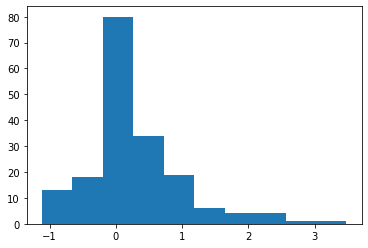

In [25]:
plt.hist(log_ridge)

(array([ 4., 13., 14., 77., 32., 19.,  9.,  5.,  3.,  4.]),
 array([-1.24649568, -0.87726087, -0.50802606, -0.13879125,  0.23044356,
         0.59967837,  0.96891317,  1.33814798,  1.70738279,  2.0766176 ,
         2.44585241]),
 <BarContainer object of 10 artists>)

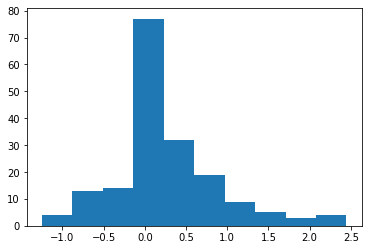

In [26]:
plt.hist(log_lasso)

(array([ 9., 15., 66., 44., 24., 12.,  4.,  1.,  4.,  1.]),
 array([-1.15369999, -0.72962222, -0.30554445,  0.11853332,  0.54261109,
         0.96668886,  1.39076663,  1.8148444 ,  2.23892217,  2.66299994,
         3.08707771]),
 <BarContainer object of 10 artists>)

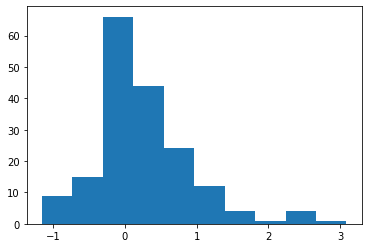

In [27]:
plt.hist(log_elastic)

In [28]:
from scipy.stats import shapiro

print("log euclid shapiro", shapiro(log_euclid))
# there is no turning back, I have committed a normal distribution
print("log ridge shapiro", shapiro(log_ridge))
print("log lasso shapiro", shapiro(log_lasso))
print("log elastic shapiro", shapiro(log_elastic))

log euclid shapiro ShapiroResult(statistic=0.9311081171035767, pvalue=1.5042415668631293e-07)
log ridge shapiro ShapiroResult(statistic=0.9064716696739197, pvalue=2.897222017850254e-09)
log lasso shapiro ShapiroResult(statistic=0.9393380880355835, pvalue=6.766536557734071e-07)
log elastic shapiro ShapiroResult(statistic=0.9196139574050903, pvalue=2.1747016631934457e-08)


In [29]:
right_ol_lof_ridge = np.mean(log_ridge) + 1.645 * np.std(log_ridge, ddof=1)
right_ol_lof_lasso = np.mean(log_lasso) + 1.645 * np.std(log_lasso, ddof=1)
right_ol_lof_elastic = np.mean(log_elastic) + 1.645 * np.std(log_elastic, ddof=1)

right_ol_lof_ridge, right_ol_lof_lasso, right_ol_lof_elastic

(1.4638301002295573, 1.3021845416261306, 1.3667200073440764)

In [30]:
lof_4dm['log_ridge'] = log_ridge
lof_4dm['log_lasso'] = log_lasso
lof_4dm['log_elastic'] = log_elastic

In [31]:
lof_4dm[['log_ridge']][lof_4dm['log_ridge'] > right_ol_lof_ridge].sort_values(by='log_ridge', ascending=False)

,log_ridge
Yuragi,3.479458
ZayyKen,2.639560
Scep,2.537195
2fast4you98,2.523674
[-Leon-],2.445657
diamondBIaze,2.329086
-Deepdive-,2.072503
Lenn,1.806512
shokoha,1.801102
palmEuEi,1.753512


In [32]:
lof_4dm[['log_lasso']][lof_4dm['log_lasso'] > right_ol_lof_lasso].sort_values(by='log_lasso', ascending=False)

,log_lasso
Yuragi,2.445852
ZayyKen,2.205874
[-Leon-],2.177674
2fast4you98,2.093121
Scep,1.943458
diamondBIaze,1.800967
shokoha,1.749597
palmEuEi,1.697333
Lenn,1.551554
-Deepdive-,1.405211


In [33]:
lof_4dm[['log_elastic']][lof_4dm['log_elastic'] > right_ol_lof_elastic].sort_values(by='log_elastic', ascending=False)

,log_elastic
Yuragi,3.087078
ZayyKen,2.421784
2fast4you98,2.313124
[-Leon-],2.300664
Scep,2.277316
diamondBIaze,2.091904
-Deepdive-,1.784505
shokoha,1.745355
palmEuEi,1.709823
Lenn,1.677769
